# Exercise 1

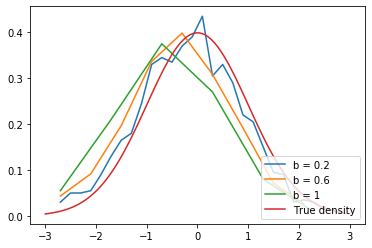

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

def hist_pdf(x, data, binwidth, minv=None, maxv=None):
    """Histogram density estimator
    
    For any x in B_l=[minv+binwidth, minv+binwidth*(i+1)] density is estimated in the following way
    
    p(x) = p(x | x \in B_l) * p(x \in B_l) = (1/delta) * (\sum_{x_j}{I(x_j \in B_l)} / N)
    
    where N - number of points in dataset"""
    
    if minv is None:
        minv = np.min(data)
    if maxv is None:
        maxv = np.max(data)
    
    bin_id = int((x-minv)/binwidth)
    bin_minv = minv+binwidth*bin_id
    bin_maxv = minv+binwidth*(bin_id+1)
    
    n_data = len(data)
    n_data_in_bin = len(data[np.where((data>bin_minv) & (data<bin_maxv))])
    
    pdf = (1.0/binwidth) * (n_data_in_bin / n_data)
    
    return pdf
  

# Plot the histogram density estimators

data_normal = norm.rvs(size=1000,loc=0,scale=1)

for binwidth in [0.2, 0.6, 1]: 
    xvals = np.arange(min(data_normal), max(data_normal),binwidth )
    pdf = [hist_pdf(x, data_normal, binwidth) for x in xvals]
    plt.plot(xvals, pdf, label = f"b = {binwidth}")

# Plot the normal distribution density(red one)
def plot_normal_distribution():
    mu = 0
    variance = 1
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, norm.pdf(x, mu, sigma), label = 'True density')
    plt.legend(loc='lower right')
    plt.show()

plot_normal_distribution()

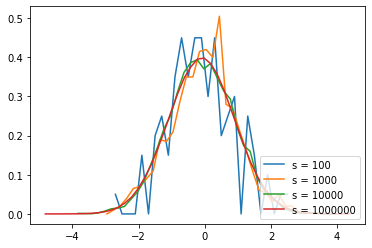

In [36]:
binwidth = 0.2

for s in [100, 1000, 10000, 1000000]:
    
    data_normal = norm.rvs(size=s,loc=0,scale=1)

    xvals = np.arange(min(data_normal), max(data_normal),binwidth )
    pdf = [hist_pdf(x, data_normal, binwidth) for x in xvals]
    plt.plot(xvals, pdf, label = f"s = {s}")
    plt.legend(loc='lower right')

We can see that the larger the sample size n is, the more consistent the estimator is for a constant binwidth.  

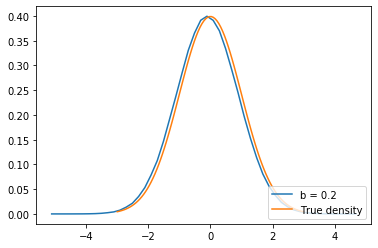

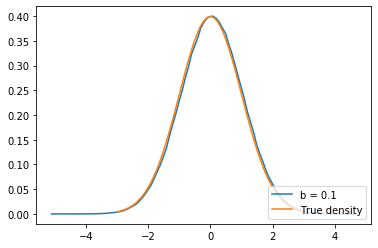

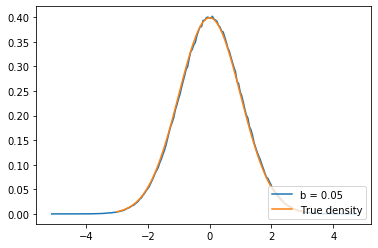

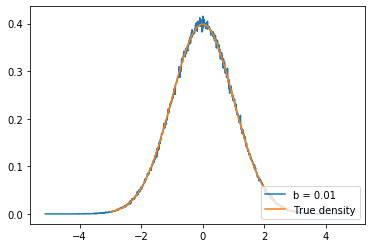

In [41]:
data_normal = norm.rvs(size=1000000,loc=0,scale=1)

for binwidth in [0.2, 0.1, 0.05, 0.01]:
    xvals = np.arange(min(data_normal), max(data_normal),binwidth )
    pdf = [hist_pdf(x, data_normal, binwidth) for x in xvals]
    plt.plot(xvals, pdf, label = f"b = {binwidth}")
    plt.legend(loc='lower right')

    plot_normal_distribution()

We fix the n in 1 million (which is sufficiently high) and vary the binwidth. We can see that if it is too high, the estimator is not very accurate, and if it is too low, the estimations are too spiky. So it is important to find a middle point for a good estimation.

# Exercise 2

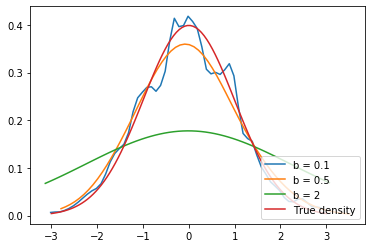

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import math


def kde_pdf(x, data, b, minv=None, maxv=None):
    
     """Kernel density estimator (with Gaussian kernel)
    
     General form of Kernel Density Estimator:
    
     p(x) = \frac{1}{N \mul h}\sum_{i=1}{N}{K(\frac{x-x_i}{h})}
    
     where K(x) = \frac{1}{\sqrt{2\pi}} \exp{\frac{x^2}{2}}"""
        
     N = len(data)
     kde = (1/(b*N)) * np.sum((1/np.sqrt(2*np.pi)) * np.exp(-((data-x)**2)/(2*(b**2))))
    
     return kde
     

# Plot the kernel density estimations

b = 0.1
for b in [0.1, 0.5, 2]:
    data_normal = norm.rvs(size=1000,loc=0,scale=1) 
    xvals = np.arange(min(data_normal), max(data_normal), 0.1)
    pdf = [kde_pdf(x, data_normal, b=b) for x in xvals]
    plt.plot(xvals, pdf, label = f"b = {b}")
    b += 0.1

# Plot the normal distribution density (red one)
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), label = 'True density')
plt.legend(loc='lower right')
plt.show()

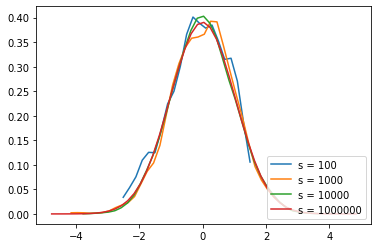

In [46]:
binwidth = 0.2

for s in [100, 1000, 10000, 1000000]:
    
    data_normal = norm.rvs(size=s,loc=0,scale=1)

    xvals = np.arange(min(data_normal), max(data_normal),binwidth )
    pdf = [kde_pdf(x, data_normal, binwidth) for x in xvals]
    plt.plot(xvals, pdf, label = f"s = {s}")
    plt.legend(loc='lower right')

We can see that the larger the sample size n is, the more consistent the estimator is for a constant binwidth.

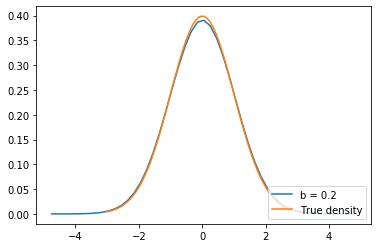

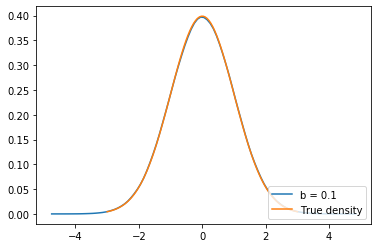

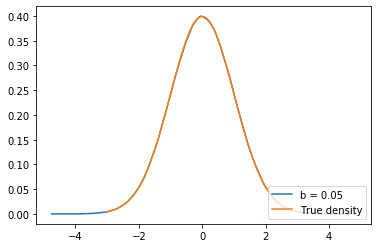

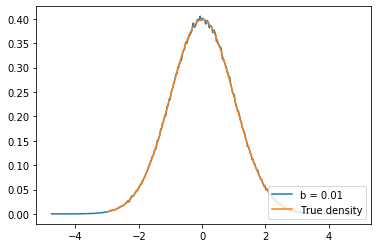

In [43]:
data_normal = norm.rvs(size=1000000,loc=0,scale=1)

for binwidth in [0.2, 0.1, 0.05, 0.01]:
    xvals = np.arange(min(data_normal), max(data_normal),binwidth )
    pdf = [kde_pdf(x, data_normal, binwidth) for x in xvals]
    plt.plot(xvals, pdf, label = f"b = {binwidth}")
    plt.legend(loc='lower right')

    plot_normal_distribution()

We fix the n in 1 million (which is sufficiently high) and vary the binwidth. We can see that if it is too high, the estimator is not very accurate, and if it is too low, the estimations are too spiky. So it is important to find a middle point for a good estimation. This is the same as happened with the histogram density estimator, though we can oberserve that this one is more accurate.